##### STEPS FOR PROJECT:
1. Data Cleaning
2. EDA(doing data analysis)
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website
8. Deploy 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1481,ham,"I'm a guy, browsin is compulsory",NaN,NaN,NaN
438,ham,"Hi hope u get this txt~journey hasnt been gd,n...",NaN,NaN,NaN
872,ham,I'll text you when I drop x off,NaN,NaN,NaN
4064,ham,Dont kick coco when he's down,NaN,NaN,NaN
5287,ham,Hey ! Don't forget ... You are MINE ... For ME...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

#### Step 1. After reading data doing Data cleaning

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##### Cleaning our data frame

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [7]:
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### Renaming columns making data more understandable and using inplace 
##### so that changes are made in same table instead of returning a new one


In [8]:
df.rename(columns={'v1': 'target','v2':'messages'},inplace=True)

In [9]:
df.head()

,target,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.sample(5)

,target,messages
1076,ham,Where can download clear movies. Dvd copies.
290,ham,Hey you told your name to gautham ah?
3629,spam,Get the official ENGLAND poly ringtone or colo...
3707,spam,Free Top ringtone -sub to weekly ringtone-get ...
706,ham,So when do you wanna gym harri


##### Using LabelEncoder library so that we can replace ham and spam 
##### with distinct number helping us in future calculations

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# next we check if there are any missing values in out table
df.isnull().sum()

target      0
messages    0
dtype: int64

In [16]:
# as both target and messages count for null values is zero
# so no missing values

In [17]:
# now we check if any duplicate rows
df.duplicated().sum()

np.int64(403)

In [18]:
# as answer is more then 0 so clearly we have 403 duplicates values
# so now cleaning those too

In [19]:
df.drop_duplicates(keep='first',inplace=True)

In [20]:
df.shape

(5169, 2)

#### Step 2: EDA(DOING ANALYSIS AND UNDERSTANDING DATA)

In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1e830b2ea50>,
 [Text(-1.014499732282844, 0.4251944181172162, ''),
  Text(1.0144998708287172, -0.42519408755122207, '')])

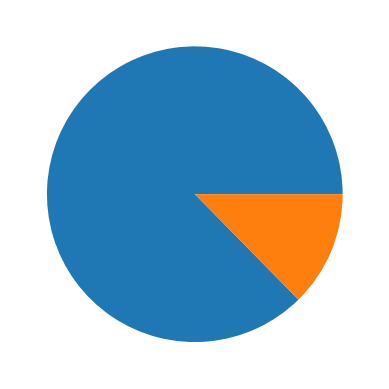

In [23]:
plt.pie(df['target'].value_counts())

([<matplotlib.patches.Wedge at 0x1e830bd8f50>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

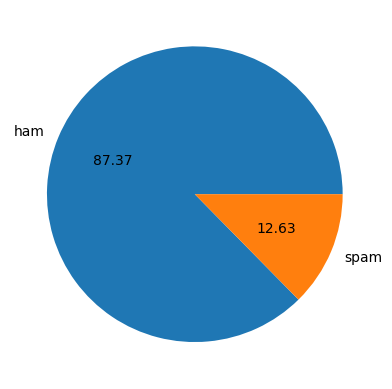

In [24]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['messages'].apply(len) #telling length of each entry(no. of characters) in messages col

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: messages, Length: 5169, dtype: int64

In [28]:
# Finding no. of character , words and sentences in every msg 
# to analyse spam and ham easily
df['num_characters'] = df['messages'].apply(len)

In [29]:
df.head()

,target,messages,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
df['messages'].apply(lambda x:nltk.word_tokenize(x)) #break message into list of words

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: messages, Length: 5169, dtype: object

In [32]:
df['messages'].apply(lambda x:len(nltk.word_tokenize(x))) 
#lambda is used for short quick functions that we only need once so we don't formally define them like: 
#lambda x: x*x 
#is same as 
#def square(x):
#   return x*x

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: messages, Length: 5169, dtype: int64

In [33]:
df['num_words'] = df['messages'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
df.head()

,target,messages,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
# similarly now calculating number of sentences per msg 
# note: these count swill help us analyze spam and ham msgs in detail
df['num_sentences'] = df['messages'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,target,messages,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
# now analysing counts using describe function
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#now checking details for ham and spam seperately
# ham:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# spam:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


###### from this analysis we can see that spam msgs are usually longer then ham


In [40]:
import seaborn as sns #help in plotting histogram

<Axes: xlabel='num_characters', ylabel='Count'>

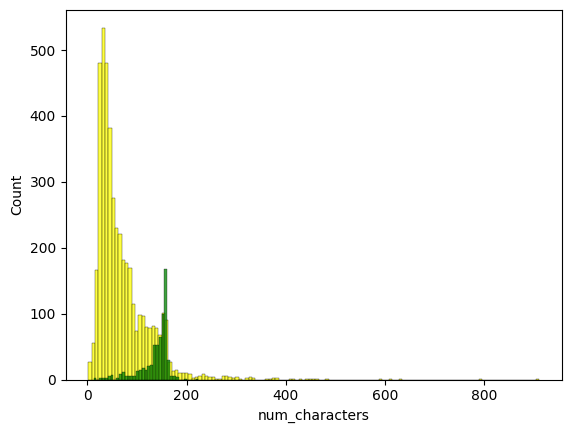

In [41]:
# you can see the difference clearly by visually plotting a histogram
sns.histplot(df[df['target'] == 0]['num_characters'],color='yellow')
sns.histplot(df[df['target'] == 1]['num_characters'],color='green')

##### from above histogram it is visible spam msgs are more on higher num_characters side showing they have larger number of characters whereas ham msgs are more on lesser num_characters side and most ham msgs have shorter length 

<Axes: xlabel='num_words', ylabel='Count'>

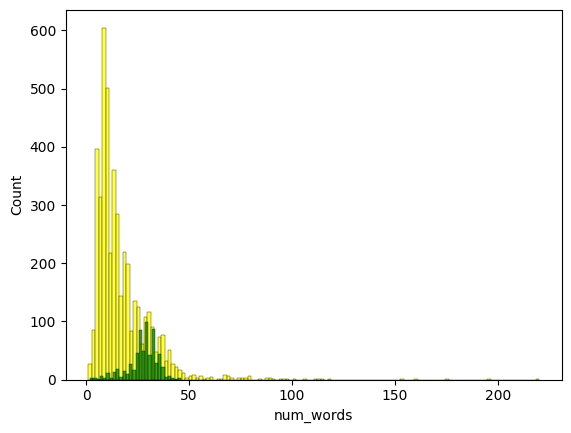

In [42]:
#doing same for words and sentences
sns.histplot(df[df['target'] == 0]['num_words'], color = 'yellow')
sns.histplot(df[df['target'] == 1]['num_words'], color = 'green')


<Axes: xlabel='num_sentences', ylabel='Count'>

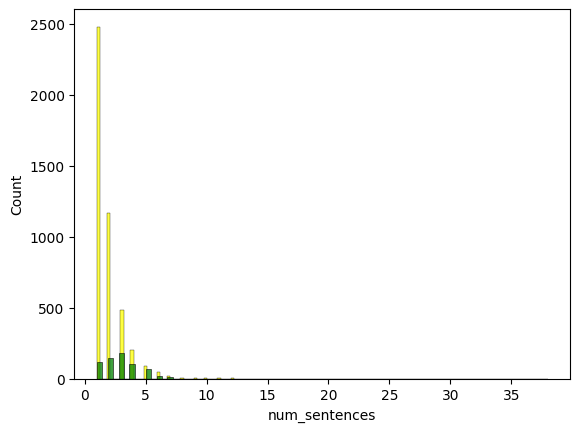

In [43]:
sns.histplot(df[df['target'] == 0]['num_sentences'], color = 'yellow')
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'green')

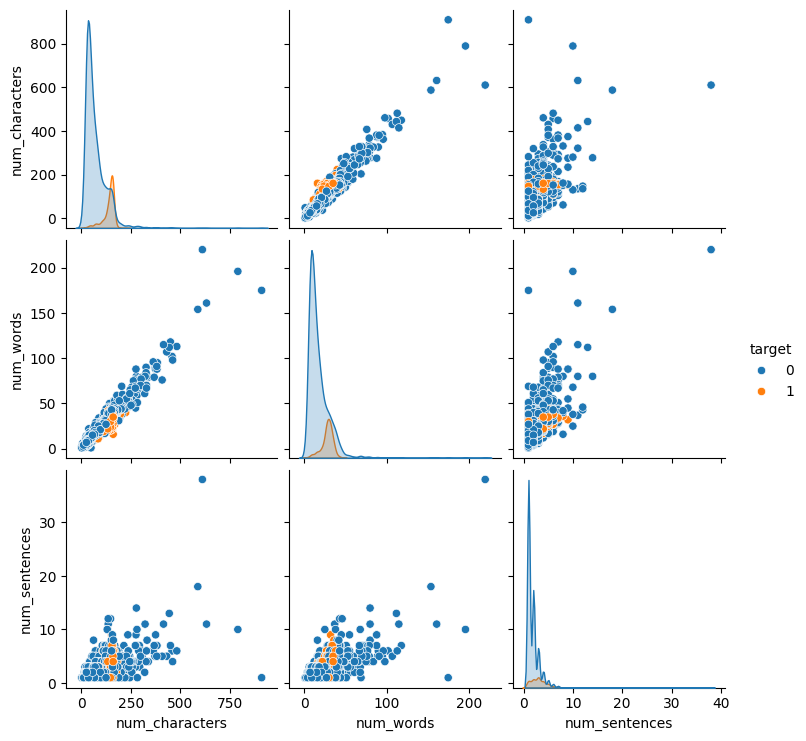

In [44]:
sns.pairplot(df,hue='target')

#### Step 3: Data Preprocessing
##### ->Lower Case
##### -> Tokenization
##### -> Removing Special Characters
##### -> Removing stop words and punctuation
##### -> Stemming

In [45]:
def transform_text(text):
    text = text.lower() #lower casing
    text = nltk.word_tokenize(text)  #making token of words
    y = []
    
    # removing special characters only keeping alphanumeric ones:
    for i in text:
        if i.isalnum(): #checks if alphanumeric or not
            y.append(i)
    text = y[:] #as lists are mutable so we copy them like this making shallow copy       
    y.clear()

    # removing stopwords and punctuation marks
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [46]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
print(stopwords.words('english'))
string.punctuation

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
transform_text("hello! amna how are you doing? broooo I am Studying WHat About you?") #checking our func

'hello amna broooo studi'

In [49]:
ps.stem("lecturing")

'lectur'

##### Applying tranform function we created on our data frame

In [50]:
df['transformed_msgs'] = df['messages'].apply(transform_text)

In [51]:
df.head()

,target,messages,num_characters,num_words,num_sentences,transformed_msgs
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##### Now as our messages have been filtered we will again perform some EDA to analyse occurence of words in ham and spam Toc check which words occur most in spam and which in ham THIS IS EXTRA WORK! helps us understand the problem and build up the model


#### EDA using WordCloud 

In [52]:
from wordcloud import WordCloud
# we are creating word cloud representation To see visually word occurences in ham and spam seperately
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white') # creating object

In [53]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_msgs'].str.cat(sep=" "))
# note: we use str and catenation func as wordcloud only works on a single string(understand plain text)
#       not on lists etc. If not used it fails to work due to incoming list of various msgs

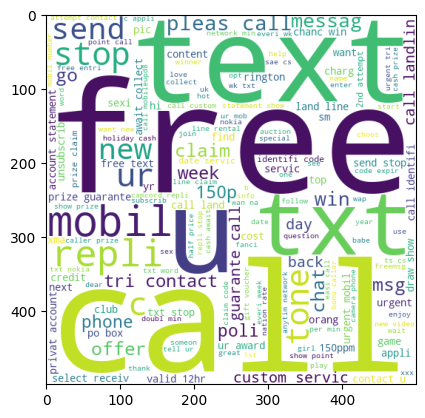

In [54]:
plt.imshow(spam_wc) # plt is pyplot library object that we use for plotting

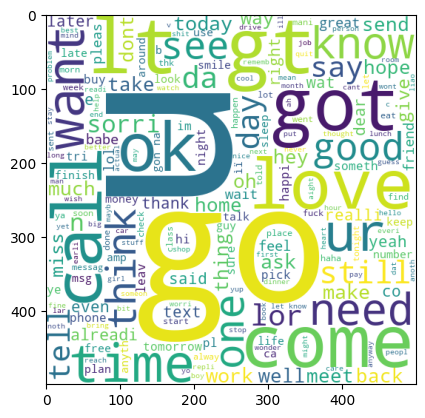

In [55]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_msgs'].str.cat(sep=" ")) # doing same for ham
plt.imshow(ham_wc)

#### EDA using Bar Graph

In [56]:
# in order to count occurence of every word we need Counter object 
# that object requires a list of words in it so forming a single
# list of words instead of list of messages
spam_corpus = []
for msg in df[df['target']==1]['transformed_msgs'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [58]:
from collections import Counter
Counter(spam_corpus) #creates a dictionary

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [59]:
# now to represent in bar graph we use this object
df_2 = pd.DataFrame(Counter(spam_corpus).most_common(30))
df_2

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


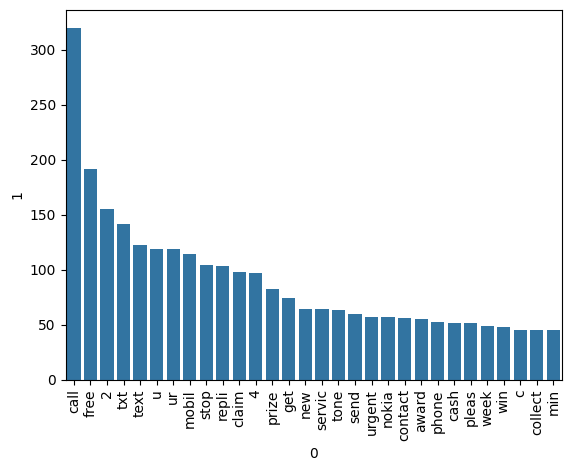

In [60]:
sns.barplot(x=df_2[0],y=df_2[1])
plt.xticks(rotation=90)
plt.show()

In [61]:
# doing same for ham now:
ham_corpse = []
for msg in df[df['target'] == 0]['transformed_msgs']:
    for word in msg.split():
        ham_corpse.append(word)

Counter(ham_corpse)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

In [62]:
df_3 = pd.DataFrame(Counter(ham_corpse).most_common(30))
df_3

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


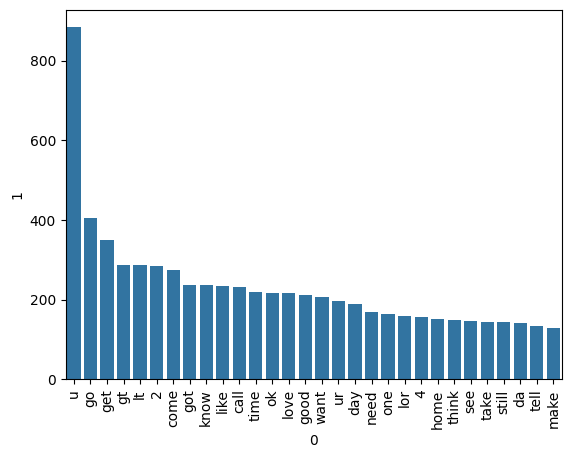

In [63]:
sns.barplot(x=df_3[0],y=df_3[1])
plt.xticks(rotation=90)
plt.show()

##### Now we have visually seen the cleaned data and analysed it

#### Step 4: Model Building
##### we will be using naive bayes algo as it is best for text format data
##### now we need to convert words to vectors(numbers) in order to implement naive bayes(requires numerical input) for that we have multiple ways like(vectorizing ways):
##### -> Bag of Words
##### -> TFIDF
##### -> Word to Vec
#### we'll be using bag of words first:

In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() # used in bag of words technique
tfidf = TfidfVectorizer() # used in TF_IDF technique

In [65]:
X = cv.fit_transform(df['transformed_msgs']).toarray()  # a func that finds vocabulary by giving number to every word and then transforms the text into vector containing respective numbers

In [66]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


###### In above function used a sparse format matrix is returned which is then converted to array by us a 2d array(just for our ease to visualize the data usely its better to use sparse matrix) in which 
###### Each row = one message
###### Each column = one word
###### Each value = word frequency 

In [67]:
X.shape

(5169, 6708)

In [68]:
y = df['target'].values #spam or ham column

In [69]:
# now both msgs and target are in number format hence we can apply model/algo

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# we are using this to split our data in 20% test and 80% training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
# now importing the model we want
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [73]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
# using gausian :
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))   # good accuracy but poor precision when this algo is used
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [75]:
# using multinomial :
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))   # better accuracy and precision(precison could be better) when this algo is used
print(confusion_matrix(y_test,y_pred2)) # as data is inbalance we need higher precion rather then accuracy
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [76]:
# using bernoulli :
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))   # much better accuracy and precision when this algo is used
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### now trying tf_idf method and analysing performance of model:
##### same as previous just uses TFidVectorizer instead of CountVectorizer

In [77]:
x = tfidf.fit_transform(df['transformed_msgs']).toarray()

In [78]:
x.shape # y is same

(5169, 6708)

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [80]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))   # similar result as bag of words technique
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [81]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))   # good accuracy and 100% precision when this algo is used
print(confusion_matrix(y_test,y_pred2)) # with tf_idf
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [82]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))   # good accuracy and almost 100% precision when this algo is used
print(confusion_matrix(y_test,y_pred3)) # with tf_idf
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


##### As precison score matter more in this problem we go with multinomialNB with TF_IDF vectorizing technique as it gives 100% precision
##### here is a thing you can improve performance by alot of techniques like:
##### -> scaling
##### -> voting Classifier(combination of multiple algos)
##### -> setting max parameter in tf idf
##### -> using stacking 
#####    etc
##### i am not applying these rn as its forst project and i don't want to dig deep in complexity 

### Extra work: using all models and comparing their performances

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [85]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [86]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [87]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [88]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381


C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239


In [92]:
models_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [93]:
models_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909
3,DT,0.935203,0.838095


In [94]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))